<a href="https://colab.research.google.com/github/adil-1522/TRANSFORMER_pytorch/blob/main/Transformers_SelfAttention_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import math

Generate **Data**

In [4]:
L,d_k,d_v = 4,8,8
q=np.random.randn(L,d_k)
k = np.random.randn(L,d_k)
v = np.random.rand(L,d_v)

In [5]:
print("Q\n",q)
print("K\n",k)
print("V\n",v)

Q
 [[ 1.44635945 -0.47451063 -0.47075094 -0.09961332  2.64350676 -0.95236167
  -0.81196304  0.42309144]
 [ 0.43751119 -0.64564907 -0.64264288  0.66103212 -0.12616742  1.81377376
   0.38961013 -0.67255301]
 [ 0.47245921  0.81148614  0.16970662  2.07678072 -0.64120224  0.357715
  -0.39056431 -1.06477475]
 [-1.49145872  1.61043112  1.27680303 -0.42086234  0.1737388   1.90099602
   0.05662534 -0.36116666]]
K
 [[-0.60529885  0.14265798 -0.02017771 -0.3687328  -0.29089157 -1.48165028
   2.08231908 -1.31514385]
 [ 1.17532174 -1.52976204 -1.38963206 -1.85825138  1.30577981  0.49847157
   0.47129658  0.95592687]
 [-1.09304526  0.70277787 -0.18470489  1.12332593  2.50852518  1.43089725
   0.64409341  1.15102055]
 [ 0.27677153  0.52174042  0.11048071  1.47297185  0.21029174 -0.10089619
   1.22013763 -0.96526854]]
V
 [[0.90720801 0.98743223 0.07522208 0.3925646  0.26394401 0.45000946
  0.61302629 0.41562752]
 [0.06082259 0.07320955 0.05398186 0.7145595  0.50720669 0.19383972
  0.99329951 0.5257905

SELF **ATTENTION**

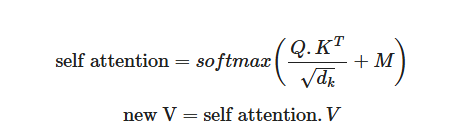

In [6]:
np.matmul(q,k.T)

array([[-2.50204222,  6.26398488,  3.29321835, -0.79310301],
       [-1.54258996,  1.44665735,  1.68493909,  1.60194888],
       [-0.69585126, -6.6419761 , -0.21832488,  4.01225696],
       [-1.0123104 , -4.35284315,  4.83012979,  0.21102353]])

In [8]:
#why do we need to sqrt the denominator
q.var(), k.var(), np.matmul(q,k.T).var()

(np.float64(1.0114057220351356),
 np.float64(1.1777599094209235),
 np.float64(10.562044622258657))

In [9]:
scaled = np.matmul(q,k.T)/math.sqrt(d_k)

In [13]:
q.var(),k.var(),scaled.var()
#notice the reduction in the variance before and after scaling

(np.float64(1.0114057220351356),
 np.float64(1.1777599094209235),
 np.float64(1.3202555777823317))

In [14]:
scaled

array([[-0.88460551,  2.21465309,  1.16432851, -0.28040426],
       [-0.54538791,  0.51147061,  0.59571593,  0.56637446],
       [-0.24602057, -2.34829317, -0.0771895 ,  1.41854705],
       [-0.35790578, -1.53896245,  1.70770877,  0.07460809]])

**MASKING**

In [17]:
mask=np.tril(np.ones((L,L)))
mask

array([[1., 0., 0., 0.],
       [1., 1., 0., 0.],
       [1., 1., 1., 0.],
       [1., 1., 1., 1.]])

In [18]:
mask[mask==0]=-np.inf
mask[mask==1]=0

In [19]:
mask

array([[  0., -inf, -inf, -inf],
       [  0.,   0., -inf, -inf],
       [  0.,   0.,   0., -inf],
       [  0.,   0.,   0.,   0.]])

In [20]:
scaled+mask

array([[-0.88460551,        -inf,        -inf,        -inf],
       [-0.54538791,  0.51147061,        -inf,        -inf],
       [-0.24602057, -2.34829317, -0.0771895 ,        -inf],
       [-0.35790578, -1.53896245,  1.70770877,  0.07460809]])

SOFTMAX

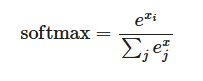

In [24]:
def softmax(x):
  return (np.exp(x).T/np.sum(np.exp(x),axis=-1)).T

In [25]:
attention = softmax(scaled+mask)

In [26]:
attention

array([[1.        , 0.        , 0.        , 0.        ],
       [0.25791025, 0.74208975, 0.        , 0.        ],
       [0.43363281, 0.05298058, 0.51338661, 0.        ],
       [0.09312525, 0.02858519, 0.73477174, 0.14351782]])

In [27]:
new_v = np.matmul(attention,v)
new_v

array([[0.90720801, 0.98743223, 0.07522208, 0.3925646 , 0.26394401,
        0.45000946, 0.61302629, 0.41562752],
       [0.27911407, 0.30899695, 0.05945993, 0.63151371, 0.44446675,
        0.25990853, 0.89522315, 0.49737837],
       [0.72880159, 0.67130704, 0.40929836, 0.24375328, 0.53276847,
        0.59038377, 0.39726381, 0.65089846],
       [0.66840285, 0.44082248, 0.64856283, 0.14829379, 0.62170296,
        0.67121503, 0.28041331, 0.81202621]])

In [28]:
v

array([[0.90720801, 0.98743223, 0.07522208, 0.3925646 , 0.26394401,
        0.45000946, 0.61302629, 0.41562752],
       [0.06082259, 0.07320955, 0.05398186, 0.7145595 , 0.50720669,
        0.19383972, 0.99329951, 0.52579054],
       [0.64704456, 0.466014  , 0.72814445, 0.0694732 , 0.76246941,
        0.74987379, 0.15350987, 0.86253135],
       [0.74381138, 0.03038633, 0.7315796 , 0.28054601, 0.15596341,
        0.50712008, 0.57231025, 0.8676784 ]])

FUNCTION

In [33]:
def softmax(x):
  return (np.exp(x).T/np.sum(np.exp(x),axis=-1)).T

def scaled_dot_product_attention(q,k,v,mask=None):
  d_k = q.shape[-1]
  scaled = np.matmul(q,k.T)/math.sqrt(d_k)
  if mask is not None:
    scaled = scaled+mask
  attention = softmax(scaled)
  out = np.matmul(attention,v)
  return out,attention

In [34]:
values, attention = scaled_dot_product_attention(q, k, v, mask=mask)
print("Q\n", q)
print("K\n", k)
print("V\n", v)
print("New V\n", values)
print("Attention\n", attention)

Q
 [[ 1.44635945 -0.47451063 -0.47075094 -0.09961332  2.64350676 -0.95236167
  -0.81196304  0.42309144]
 [ 0.43751119 -0.64564907 -0.64264288  0.66103212 -0.12616742  1.81377376
   0.38961013 -0.67255301]
 [ 0.47245921  0.81148614  0.16970662  2.07678072 -0.64120224  0.357715
  -0.39056431 -1.06477475]
 [-1.49145872  1.61043112  1.27680303 -0.42086234  0.1737388   1.90099602
   0.05662534 -0.36116666]]
K
 [[-0.60529885  0.14265798 -0.02017771 -0.3687328  -0.29089157 -1.48165028
   2.08231908 -1.31514385]
 [ 1.17532174 -1.52976204 -1.38963206 -1.85825138  1.30577981  0.49847157
   0.47129658  0.95592687]
 [-1.09304526  0.70277787 -0.18470489  1.12332593  2.50852518  1.43089725
   0.64409341  1.15102055]
 [ 0.27677153  0.52174042  0.11048071  1.47297185  0.21029174 -0.10089619
   1.22013763 -0.96526854]]
V
 [[0.90720801 0.98743223 0.07522208 0.3925646  0.26394401 0.45000946
  0.61302629 0.41562752]
 [0.06082259 0.07320955 0.05398186 0.7145595  0.50720669 0.19383972
  0.99329951 0.5257905